In [11]:
mortgage_loans_interest_rate_Q = pd.DataFrame([
  7.0, 6.8, 6.4, 6.2, 6.2, 6.5, 6.8, 6.9, 7.0, 7.0, 7.1, 6.8, 6.2, 5.5, 
  5.1, 5.1, 5.2, 5.3, 5.3, 4.7, 4.6, 4.3, 4.4, 4.4, 4.4, 4.5, 4.5, 4.4, 
  4.4, 4.4, 4.4, 4.4, 4.4, 4.3, 4.3, 4.4, 4.4, 4.3, 4.3, 4.4, 4.3, 3.6, 
  3.1, 2.9, 2.8, 2.9, 2.9, 3.7, 5.5, 7.3, 9.0, 9.2, 8.8, 8.6, 8.2, 7.7, 
  7.6, 7.8, 7.8, 7.4, 7.4
])
mortgage_loans_interest_rate_Q.rename(columns={0: 'Interest Rate'}, inplace=True)

In [12]:
import pandas as pd

df_GDP = pd.read_csv("C:\\Users\\Tadek\\Downloads\\Rachunki narodowe_kwartalne.csv", encoding='utf-8', sep=';')

# Assuming 'wskaźnik' is the first column
indicator_column = df_GDP.columns[0]

# Filter for 'Produkt krajowy brutto (ceny bieżące)'
df_GDP = df_GDP[df_GDP[indicator_column] == 'Produkt krajowy brutto (ceny bieżące)']

# Filter for years 2010 onward, including quarterly columns
columns_to_keep = [indicator_column] + [col for col in df_GDP.columns if (col.isdigit() and int(col) >= 2010) or (col.split('.')[0].isdigit() and int(col.split('.')[0]) >= 2010)]
df_GDP = df_GDP[columns_to_keep]

# Convert to long format
df_GDP_long = df_GDP.melt(id_vars=[indicator_column], var_name='Period', value_name='GDP')

# Drop the indicator column as we are only interested in the values
df_GDP_long = df_GDP_long.drop(columns=[indicator_column])

# Extract year and quarter from the 'Period' column
df_GDP_long['Year'] = df_GDP_long['Period'].apply(lambda x: x.split('.')[0])
df_GDP_long['Quarter'] = df_GDP_long['Period'].apply(lambda x: 'Q' + str(int(x.split('.')[1]) + 1) if '.' in x else 'Q1')

# Drop the 'Period' column as we now have 'Year' and 'Quarter'
df_GDP_long = df_GDP_long.drop(columns=['Period'])

df_GDP_long

,GDP,Year,Quarter
0,"330053,2",2010,Q1
1,"349427,2",2010,Q2
2,"356417,9",2010,Q3
3,"405751,3",2010,Q4
4,"357647,3",2011,Q1
5,"377007,5",2011,Q2
6,"386044,4",2011,Q3
7,"443236,2",2011,Q4
8,"377386,8",2012,Q1
9,"397144,9",2012,Q2


In [13]:
import pandas as pd
import re

# Read the population data
df_population = pd.read_csv("D:\\lion's den\\LUDN_2425_CTAB_20250308210859.csv", encoding='utf-8', sep=';')

# Assuming the first two columns are metadata and data starts from the 3rd column
metadata_columns = df_population.columns[:2]
data_columns = df_population.columns[2:]

# Extract years from column names
year_pattern = re.compile(r'\b(20\d{2})\b')
years = [year_pattern.search(col).group(0) for col in data_columns if year_pattern.search(col)]

# Filter for years 2010 onward
data_columns = [col for col in data_columns if year_pattern.search(col) and int(year_pattern.search(col).group(0)) >= 2010]
df_population = df_population[metadata_columns.tolist() + data_columns]

# Rename columns to extract year and quarter
df_population.columns = metadata_columns.tolist() + [year_pattern.search(col).group(0) + ('.' + col.split('.')[-1] if '.' in col else '') for col in data_columns]

# Convert to long format
df_population_long = df_population.melt(id_vars=metadata_columns, var_name='Period', value_name='Population')

# Extract year and quarter from the 'Period' column
df_population_long['Year'] = df_population_long['Period'].apply(lambda x: x.split('.')[0])
df_population_long['Quarter'] = df_population_long['Period'].apply(lambda x: 'Q' + str(int(x.split('.')[1]) + 1) if '.' in x else 'Q1')

# Drop the 'Period' column as we now have 'Year' and 'Quarter'
df_population_long = df_population_long.drop(columns=['Period'])

# Convert Population to float
df_population_long['Population'] = df_population_long['Population'].str.replace(',', '').astype(float)

# Interpolate linearly for each quarter
df_population_long['Year'] = df_population_long['Year'].astype(int)
df_population_long = df_population_long.sort_values(by=['Year', 'Quarter'])

# Create a new DataFrame with quarterly data
years = df_population_long['Year'].unique()
quarters = ['Q1', 'Q2', 'Q3', 'Q4']
quarterly_data = []

for year in years:
    for quarter in quarters:
        quarterly_data.append({'Year': year, 'Quarter': quarter})

df_quarters = pd.DataFrame(quarterly_data)

# Merge the quarterly data with the population data
df_population_quarterly = pd.merge(df_quarters, df_population_long, on=['Year', 'Quarter'], how='left')

# Interpolate the population values linearly
df_population_quarterly['Population'] = df_population_quarterly['Population'].interpolate(method='linear')
df_population_quarterly = df_population_quarterly.drop(df_population_quarterly.columns[2:4], axis=1)
df_population_quarterly

,Year,Quarter,Population
0,2010,Q1,32869.00
1,2010,Q2,32909.50
2,2010,Q3,32950.00
3,2010,Q4,32990.50
4,2011,Q1,33031.00
5,2011,Q2,33065.00
6,2011,Q3,33099.00
7,2011,Q4,33133.00
8,2012,Q1,33167.00
9,2012,Q2,33210.00


In [14]:
import pandas as pd
import numpy as np
import re

def transform_inflation_to_long_format(file_path):
    """
    Extract inflation data from the CSV file and transform it to long format.
    
    Parameters:
    file_path (str): Path to the CSV file
    
    Returns:
    pandas.DataFrame: Inflation data in long format with columns for period, year, quarter, and inflation
    """
    try:
        # Read the raw data as text lines
        with open(file_path, 'r', encoding='utf-8') as f:
            lines = f.readlines()
        
        # Split lines by semicolon
        data = [line.strip().split(';') for line in lines]
        
        # Find the inflation row
        inflation_row_idx = None
        for i, row in enumerate(data):
            if len(row) > 2 and 'Wskaźniki cen towarów i usług konsumpcyjnych' in row[0] and 'analogiczny okres roku poprzedniego=100' in row[2] and 'od początku roku' not in row[2]:
                inflation_row_idx = i
                break
        
        if inflation_row_idx is None:
            raise ValueError("Could not find inflation data with analogous period methodology")
        
        # Extract header rows and inflation row
        year_row = data[0][3:]  # Skip first 3 columns
        quarter_row = data[1][3:]  # Skip first 3 columns
        inflation_row = data[inflation_row_idx][3:]  # Skip first 3 columns
        
        # Create lists for our long format data
        periods = []
        years = []
        quarters = []
        values = []
        
        # Process each column of data
        for i in range(min(len(year_row), len(quarter_row), len(inflation_row))):
            year_str = year_row[i].strip()
            quarter_str = quarter_row[i].strip()
            value_str = inflation_row[i].strip().replace(',', '.')
            
            # Skip empty cells
            if not year_str or not quarter_str or not value_str:
                continue
                
            # Extract year (4-digit number)
            year_match = re.search(r'(\d{4})', year_str)
            if not year_match:
                continue
            year = year_match.group(1)
            
            # Extract quarter number
            quarter_match = re.search(r'(\d+)', quarter_str)
            if not quarter_match:
                continue
            quarter_num = quarter_match.group(1)
            quarter_label = f"Q{quarter_num}"
            
            # Convert value to float
            try:
                value = float(value_str)
            except ValueError:
                continue  # Skip non-numeric values
                
            # Create period string (e.g., "2000Q1")
            period = f"{year}{quarter_label}"
            
            # Add to our lists
            periods.append(period)
            years.append(int(year))
            quarters.append(quarter_label)
            values.append(value)
        
        # Create DataFrame
        df = pd.DataFrame({
            'period': periods,
            'year': years,
            'quarter': quarters,
            'inflation': values
        })
        
        # Sort by year and quarter
        df = df.sort_values(['year', 'quarter'])
        
        return df
        
    except Exception as e:
        print(f"Error: {e}")
        # Return at least an empty DataFrame with the correct columns
        return pd.DataFrame(columns=['period', 'year', 'quarter', 'inflation'])


# Example usage:
df_inflation = transform_inflation_to_long_format("D:\\lion's den\\Wskazniki_cen_kwartalne.csv")

df_inflation.drop(columns=['period'], inplace=True)
df_inflation[df_inflation['year'].astype(int) >= 2010]
df_inflation.rename(columns={'year': 'Year', 'quarter': 'Quarter', 'inflation': 'Inflation'}, inplace=True)
print(df_inflation)

    Year Quarter  Inflation
0   2000      Q1      110.3
1   2000      Q2      110.0
2   2000      Q3      110.8
3   2000      Q4      109.2
4   2001      Q1      106.7
..   ...     ...        ...
95  2023      Q4      106.4
96  2024      Q1      102.8
97  2024      Q2      102.5
98  2024      Q3      104.5
99  2024      Q4      104.8

[100 rows x 3 columns]


In [15]:
import pandas as pd
import numpy as np
import re
import pandas as pd
import re

def extract_wages_simple(file_path):
    """
    Extract quarterly wage data from wide format to long format.
    """
    # Read the file, only first row since there's just one row of data
    df = pd.read_csv(file_path, sep=';', nrows=1)
    
    # Get region code and name from first columns
    region_code = df.iloc[0, 0]
    region_name = df.iloc[0, 1]
    
    # Prepare data for long format
    data = []
    
    # Process each column (starting from the 3rd column which has the wage data)
    for col in df.columns[2:]:
        # Skip if empty column
        if pd.isna(df[col].iloc[0]) or df[col].iloc[0] == '':
            continue
            
        # Extract year and quarter from column name
        match = re.search(r'(\d+) kwartał;ogółem;(\d+)', col)
        if match:
            quarter = int(match.group(1))
            year = int(match.group(2))
            
            # Extract the value
            value = df[col].iloc[0]
            if value and value != '':
                # Convert to float, handling comma as decimal separator
                try:
                    value_float = float(str(value).replace(',', '.'))
                    
                    # Add to data list
                    data.append({
                        'Year': year,
                        'Quarter': quarter,
                        'income': value_float
                    })
                except:
                    pass
    
    # Create DataFrame
    result = pd.DataFrame(data)
    
    # Sort by year and quarter
    result = result.sort_values(['Year', 'Quarter'])
    
    return result

# Example usage
if __name__ == "__main__":
    file_path = "D:\\lion's den\\WYNA_2504_CTAB_20250308224119.csv"
    wages_df = extract_wages_simple(file_path)
    wages_df['Quarter'].replace({1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'}, inplace=True)
    print(wages_df)
   

    Year Quarter   income
0   2010      Q1  4526.81
15  2010      Q2  4410.17
30  2010      Q3  4262.55
45  2010      Q4  4484.24
1   2011      Q1  4727.98
16  2011      Q2  4544.77
31  2011      Q3  4523.87
46  2011      Q4  4708.90
2   2012      Q1  4802.96
17  2012      Q2  4722.11
32  2012      Q3  4571.83
47  2012      Q4  4768.43
3   2013      Q1  4879.54
18  2013      Q2  4735.92
33  2013      Q3  4691.86
48  2013      Q4  4939.61
4   2014      Q1  5098.44
19  2014      Q2  4924.09
34  2014      Q3  4852.96
49  2014      Q4  5047.50
5   2015      Q1  5267.32
20  2015      Q2  5036.68
35  2015      Q3  5002.71
50  2015      Q4  5231.30
6   2016      Q1  5435.95
21  2016      Q2  5215.26
36  2016      Q3  5147.24
51  2016      Q4  5403.01
7   2017      Q1  5600.99
22  2017      Q2  5459.95
37  2017      Q3  5412.94
52  2017      Q4  5800.40
8   2018      Q1  5973.72
23  2018      Q2  5817.31
38  2018      Q3  5788.92
53  2018      Q4  6131.29
9   2019      Q1  6336.70
24  2019    

C:\Users\Tadek\AppData\Local\Temp\ipykernel_39464\527024295.py:61: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  wages_df['Quarter'].replace({1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'}, inplace=True)


In [16]:
df_unemployment = pd.read_csv("D:\\lion's den\\merged_statistical_data.csv", encoding='utf-8')

df_unemployment = df_unemployment[(df_unemployment['region_code'] == 1465000)&(df_unemployment['indicator'] == 'stopa bezrobocia rejestrowanego')&(df_unemployment['year'] >= 2010)]
df_unemployment = df_unemployment[['value', 'year', 'date']]
df_unemployment['date'] = pd.to_datetime(df_unemployment['date'])
df_unemployment['quarter'] = df_unemployment['date'].dt.quarter
df_unemployment = df_unemployment.groupby(['year', 'quarter'])['value'].mean().reset_index()
df_unemployment['quarter'].replace({1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'}, inplace=True)
df_unemployment.rename(columns={'year': 'Year', 'quarter': 'Quarter', 'value': 'Unemployment Rate'}, inplace=True)
df_unemployment.head()

C:\Users\Tadek\AppData\Local\Temp\ipykernel_39464\3304711038.py:1: DtypeWarning: Columns (7,9,10,11,12,14,15,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_unemployment = pd.read_csv("D:\\lion's den\\merged_statistical_data.csv", encoding='utf-8')
C:\Users\Tadek\AppData\Local\Temp\ipykernel_39464\3304711038.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_unemployment['quarter'].replace({1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'}, inplace=True)


,Year,Quarter,Unemployment Rate
0,2013,Q1,4.700000
1,2013,Q2,4.833333
2,2013,Q3,4.866667
3,2013,Q4,4.800000
4,2014,Q1,4.900000


In [17]:
import pandas as pd
import re
import numpy as np

def transform_excel_to_dataframe(file_path):
    """
    Transform the Excel file into a clean DataFrame with separate year and quarter columns.
    
    Parameters:
    file_path (str): Path to the Excel file
    
    Returns:
    pandas.DataFrame: Transformed DataFrame
    """
    # Read the Excel file
    # Skip rows since the header is in row 3 (index 2)
    df_raw = pd.read_excel(file_path, header=None)
    
    # Find all rows with quarter pattern (e.g., "1Q2010")
    period_pattern = re.compile(r'\d+Q\d{4}')
    
    # Extract rows with period information
    rows_with_period = []
    for idx, row in df_raw.iterrows():
        if pd.notnull(row[0]) and isinstance(row[0], str) and period_pattern.match(row[0]):
            rows_with_period.append(idx)
    
    # Extract only rows with period information
    df_filtered = df_raw.iloc[rows_with_period].copy()
    
    # Set column names
    df_filtered.columns = ['period'] + [f'column_{i}' for i in range(1, len(df_filtered.columns))]
    
    # First approach: use positional indexing to get columns
    df_clean = df_filtered.iloc[:, [0, 2, 3]].copy()
    
    # Rename columns based on the header identified earlier
    df_clean.columns = ['period', 'budownictwo', 'obsluga_rynku_nieruchomosci']
    
    # Alternative approach:
    # df_clean = df_filtered[['period', 'column_1', 'column_2']].copy()
    # df_clean.columns = ['period', 'budownictwo', 'obsluga_rynku_nieruchomosci']
    
    # Function to extract year and quarter from period string
    def extract_year_quarter(period_str):
        match = re.match(r'(\d+)Q(\d+)', period_str)
        if match:
            quarter = int(match.group(1))
            year = int(match.group(2))
            return pd.Series([year, quarter])
        return pd.Series([np.nan, np.nan])
    
    # Extract year and quarter into separate columns
    df_clean[['year', 'quarter']] = df_clean['period'].apply(extract_year_quarter)
    
    # Convert numeric columns to appropriate data types
    df_clean['year'] = df_clean['year'].astype('Int64')
    df_clean['quarter'] = df_clean['quarter'].astype('Int64')
    
    # Handle missing values in numeric columns
    for col in ['budownictwo', 'obsluga_rynku_nieruchomosci']:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
    
    # Reorder columns for better readability
    df_clean = df_clean[['period', 'year', 'quarter', 'budownictwo', 'obsluga_rynku_nieruchomosci']]
    
    return df_clean


# Example usage:
df_investments = transform_excel_to_dataframe("D:\\lion's den\\dane_inwestycje.xlsx")
print(df_investments.head())
df_investments.drop(columns=['period'], inplace=True)
df_investments.rename(columns={'budownictwo': 'Construction Investments', 'obsluga_rynku_nieruchomosci': 'Real Estate Market Services'}, inplace=True)
df_investments['quarter'] = 'Q' + df_investments['quarter'].astype(str)
df_investments.rename(columns={'year': 'Year', 'quarter': 'Quarter'}, inplace=True)
df_investments.head()
# df.to_csv('transformed_data.csv', index=False)

   period  year  quarter  budownictwo  obsluga_rynku_nieruchomosci
3  1Q2010  2010        1          NaN                          NaN
4  2Q2010  2010        2        912.4                        678.8
5  3Q2010  2010        3       1806.6                       1106.1
6  4Q2010  2010        4       2773.5                       1650.3
7  1Q2011  2011        1        520.9                        205.6


,Year,Quarter,Construction Investments,Real Estate Market Services
3,2010,Q1,NaN,NaN
4,2010,Q2,912.4,678.8
5,2010,Q3,1806.6,1106.1
6,2010,Q4,2773.5,1650.3
7,2011,Q1,520.9,205.6


In [ ]:
df_merged = df_GDP_long.merge(df_population_quarterly, on=['Year', 'Quarter'], how='left')
df_merged = df_merged.merge(df_unemployment, on=['Year', 'Quarter'], how='left')
df_merged = df_merged.join(mortgage_loans_interest_rate_Q)
df_merged = df_merged.merge(wages_df, on=['Year', 'Quarter'], how='left')
df_merged = df_merged.merge(df_investments, on=['Year', 'Quarter'], how='left')
df_merged = df_merged.merge(df_inflation, on=['Year', 'Quarter'], how='left')
df_merged = df_merged.merge(df_prices, on=['Year', 'Quarter'], how='left')

cols = df_merged.columns.tolist()
first_col = cols.pop(0)  
cols.insert(2, first_col) 
df_merged = df_merged[cols] 
df_merged.head()

df_merged.to_csv("D:\\lion's den\\final_macro_data.csv", index=False)


,Year,Quarter,GDP,Population,Interest Rate,income,Construction Investments,Real Estate Market Services,Inflation,Warszawa rynek pierwotny,Warszawa rynek wtórny,Date
0,2010,Q1,330053.2,32869.0,7.0,4526.81,912.4,678.8,103.0,9118.689940,9901.014979,2010-02-01
1,2010,Q2,349427.2,32909.5,6.8,4410.17,912.4,678.8,102.3,8550.997477,9982.014518,2010-05-01
2,2010,Q3,356417.9,32950.0,6.4,4262.55,1806.6,1106.1,102.2,8294.768957,9787.592920,2010-08-01
3,2010,Q4,405751.3,32990.5,6.2,4484.24,2773.5,1650.3,102.9,8133.259354,9766.837903,2010-11-01
4,2011,Q1,357647.3,33031.0,6.2,4727.98,520.9,205.6,103.8,8211.000000,9706.000000,2011-02-01


                             const  Population  Interest Rate    income  \
const                          NaN         NaN            NaN       NaN   
Population                     NaN    1.000000       0.005177  0.885580   
Interest Rate                  NaN    0.005177       1.000000  0.353159   
income                         NaN    0.885580       0.353159  1.000000   
Construction Investments       NaN    0.376684       0.130691  0.402443   
Real Estate Market Services    NaN    0.523434       0.186853  0.505130   
Inflation                      NaN    0.549343       0.617166  0.579422   

                             Construction Investments  \
const                                             NaN   
Population                                   0.376684   
Interest Rate                                0.130691   
income                                       0.402443   
Construction Investments                     1.000000   
Real Estate Market Services                  0.897316   


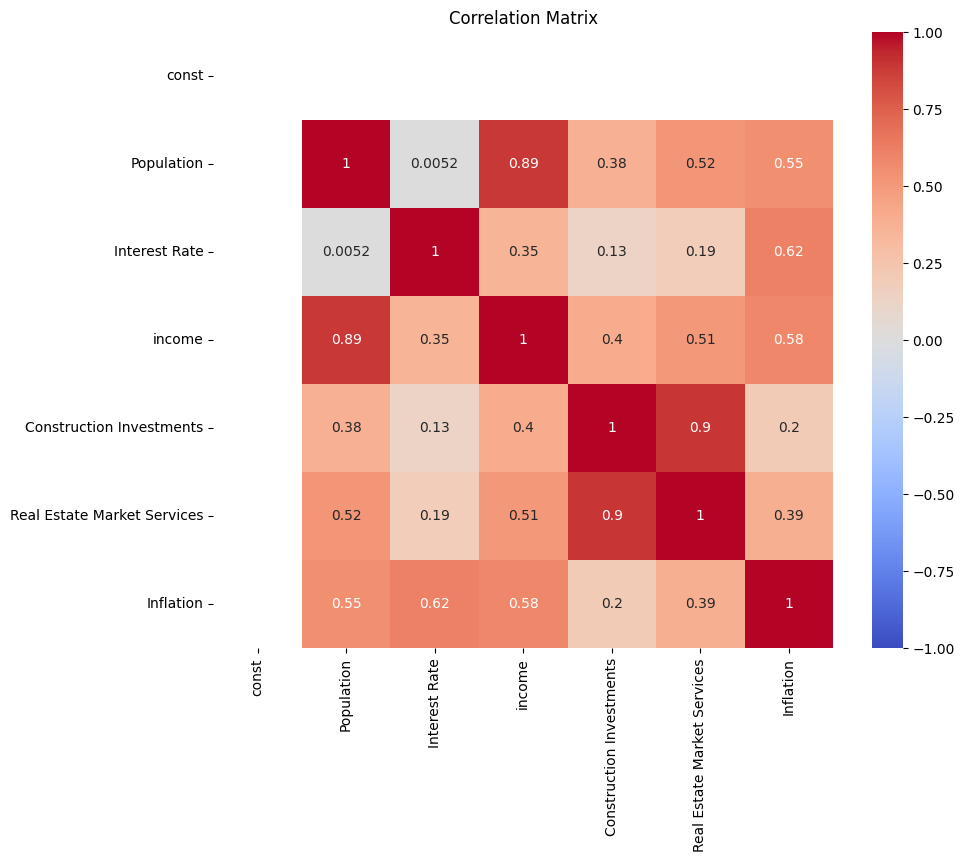

                               OLS Regression Results                               
Dep. Variable:     Warszawa rynek pierwotny   R-squared:                       0.955
Model:                                  OLS   Adj. R-squared:                  0.950
Method:                       Least Squares   F-statistic:                     186.6
Date:                      Sun, 09 Mar 2025   Prob (F-statistic):           8.23e-34
Time:                              18:29:25   Log-Likelihood:                -466.14
No. Observations:                        60   AIC:                             946.3
Df Residuals:                            53   BIC:                             960.9
Df Model:                                 6                                         
Covariance Type:                  nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

Testing different ARIMA models:
ARIMA(1, 1, 0) - AIC: 826.8899105365059
ARIMA(0, 1, 1) - AIC: 833.383614334424
ARIMA(1, 1, 1) - AIC: 825.9978317614227


C:\Users\Tadek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2) - AIC: 828.5729774740339

Best model is ARIMA(1, 1, 1) with AIC 825.9978317614227
                                  SARIMAX Results                                   
Dep. Variable:     Warszawa rynek pierwotny   No. Observations:                   60
Model:                       ARIMA(1, 1, 1)   Log Likelihood                -405.999
Date:                      Sun, 09 Mar 2025   AIC                            825.998
Time:                              18:31:18   BIC                            840.541
Sample:                                   0   HQIC                           831.675
                                       - 60                                         
Covariance Type:                        opg                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Interest Rate              172.8623  

C:\Users\Tadek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Training data shape: (48, 12), Test data shape: (12, 12)
Model trained. Summary:
                                  SARIMAX Results                                   
Dep. Variable:     Warszawa rynek pierwotny   No. Observations:                   48
Model:                       ARIMA(2, 1, 2)   Log Likelihood                -307.684
Date:                      Sun, 09 Mar 2025   AIC                            637.368
Time:                              18:33:09   BIC                            657.719
Sample:                                   0   HQIC                           645.026
                                       - 48                                         
Covariance Type:                        opg                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Interest Rate                  -0.8348    145.2

C:\Users\Tadek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


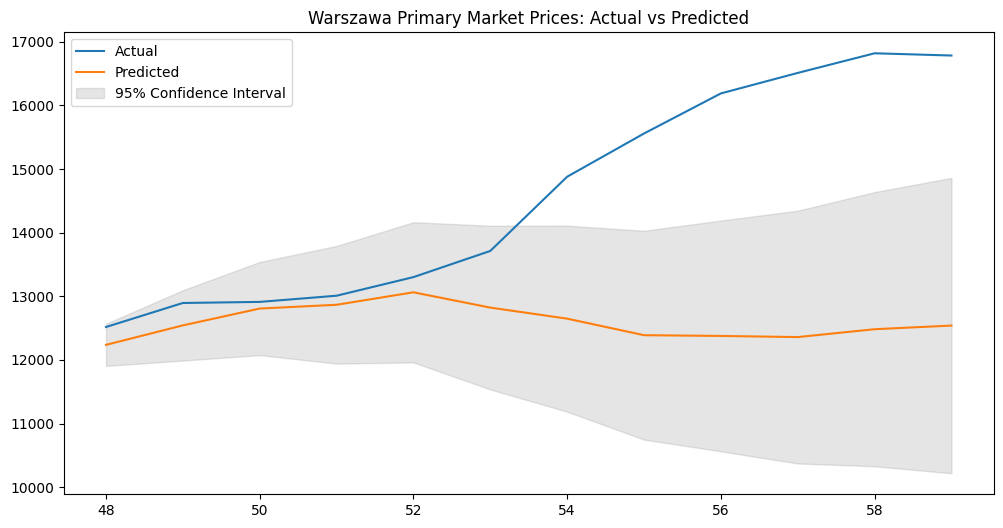

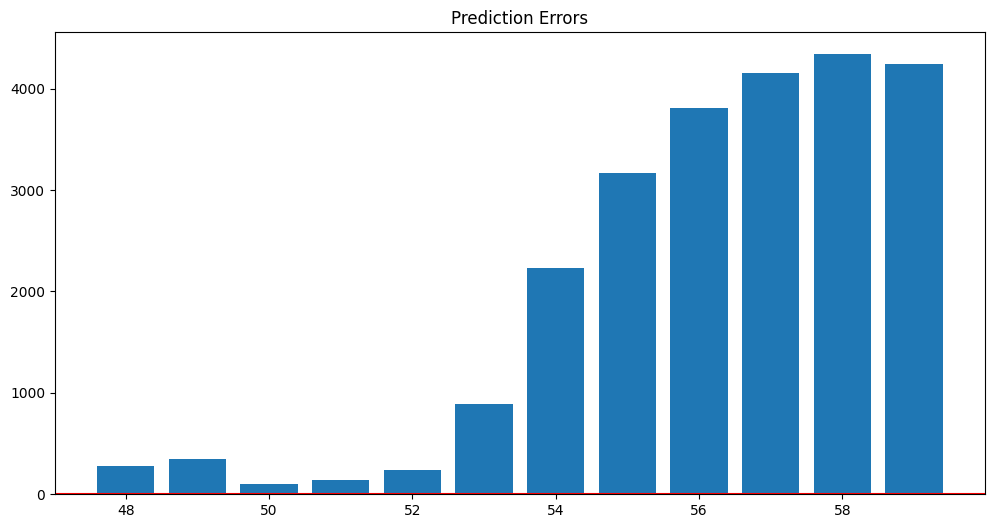